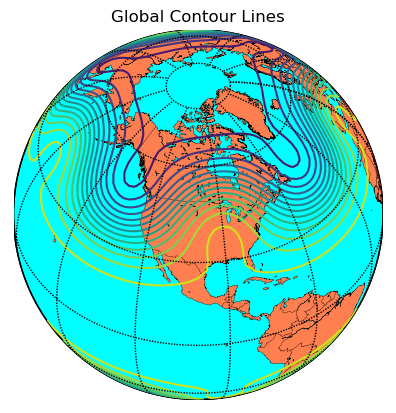

In [6]:
using PyPlot, PyCall
basemap = pyimport("mpl_toolkits.basemap")

# Set up orthographic map projection with perspective of satellite looking down at 45N, 100W.
# Use low resolution coastlines.
map = basemap.Basemap(projection="ortho", lat_0=45, lon_0=-100, resolution="l")

# Draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color="coral",lake_color="aqua")

# Draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color="aqua")

# Draw lat/lon grid lines every 30 degrees.
map.drawmeridians(collect(0:30:360))
map.drawparallels(collect(-90:30:90))

# Make up some data on a regular lat/lon grid.
nLats = 73; nLons = 145; δ = 2π/(nLons-1)
lats = repeat(0.5π .- δ*[i for i = 1:nLats], 1, nLons)
lons = repeat(δ*[j for j = 1:nLons]', nLats)

wave = 0.75(sin.(2lats).^8).*cos.(4lons)
mean = 0.5cos.(2lats).*(sin.(2lats).^2 .+ 2)

# Compute native map projection coordinates of lat/lon grid.
x, y = map(rad2deg.(lons), rad2deg.(lats))

# Contour data over the map.
cs = map.contour(x, y, wave+mean, 15, linewidths=1.5)
title("Global Contour Lines")